In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder , StandardScaler

from sklearn.metrics import confusion_matrix , accuracy_score  ,classification_report



In [68]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [69]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [70]:
df.shape

(1470, 35)

In [71]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [72]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [73]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Handel y (categorical data) by using labelencoder

In [74]:
mylabelencoder = LabelEncoder()
y = mylabelencoder.fit_transform(y)

In [75]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [76]:
myordinal = OrdinalEncoder()
X[X.select_dtypes('object').columns] = myordinal.fit_transform(X.select_dtypes('object'))

In [77]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,0.0,1.0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,0.0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,0.0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,0.0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,0.0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,0.0,1.0,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,0.0,14,3,4,80,0,17,3,2,9,6,0,8


In [78]:
x_train , x_test ,y_train ,y_test = train_test_split(X ,y , test_size=0.3 , random_state=101)

In [79]:
# standerscaler

myscaler = StandardScaler()
x_train=myscaler.fit_transform(x_train)
x_test = myscaler.transform(x_test)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((1029, 34), (441, 34), (1029,), (441,))

In [81]:
mymodel = LogisticRegression()
mymodel.fit(x_train, y_train)
y_predect = mymodel.predict(x_test)

In [82]:
accuracy_score(y_test , y_predect)

0.854875283446712

In [83]:
confusion_matrix(y_test , y_predect)

array([[355,  16],
       [ 48,  22]], dtype=int64)

<Axes: >

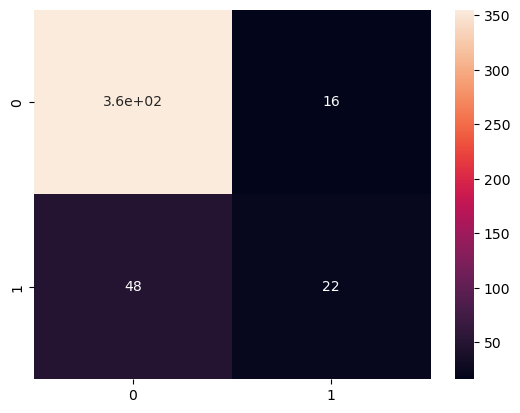

In [84]:
sns.heatmap(confusion_matrix(y_test , y_predect), annot=True)

<Axes: xlabel='count', ylabel='Attrition'>

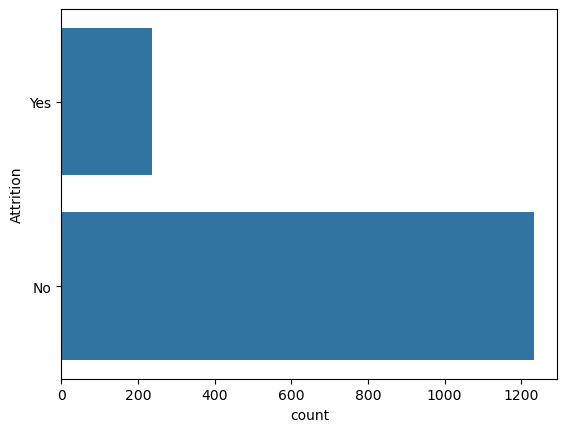

In [85]:
sns.countplot(df['Attrition'])

In [86]:
print(classification_report(y_test , y_predect))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       371
           1       0.58      0.31      0.41        70

    accuracy                           0.85       441
   macro avg       0.73      0.64      0.66       441
weighted avg       0.83      0.85      0.84       441

